In [ ]:
import pandas as pd
data = pd.read_csv("drive/MyDrive/MachineLearningCVE.csv")

In [ ]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1246875.000,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0,0,0,0,0,0,7,440,4,358,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3937777.778,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0,0,0,0,0,0,9,600,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4652282.158,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0,0,0,0,0,0,7,2776,4,2830,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1608610.568,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0,0,0,0,0,0,7,452,4,370,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4600258.732,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538462,68.000000,736.0,204,0,0,0,0,0,0,9,612,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
len(data.columns)

79

In [ ]:
len(data)

2300825

In [ ]:
data.dropna()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1.246875e+06,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0,0,0,0,0,0,7,440,4,358,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3.937778e+06,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0,0,0,0,0,0,9,600,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4.652282e+06,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0,0,0,0,0,0,7,2776,4,2830,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1.608611e+06,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0,0,0,0,0,0,7,452,4,370,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4.600259e+06,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538462,68.000000,736.0,204,0,0,0,0,0,0,9,612,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300820,61374,61,1,1,6,6,6,6,6.000000,0.000000,6,6,6.0,0.000000,1.967213e+05,32786.885250,61.000000,0.000000,61,61,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,16393.442620,16393.442620,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2300821,61378,72,1,1,6,6,6,6,6.000000,0.000000,6,6,6.0,0.000000,1.666667e+

In [ ]:
import numpy as np
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [ ]:
data.shape

(2298395, 79)

In [ ]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [ ]:
X.shape[1]

78

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [31 33 56 57 58 59 60 61] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Feature 0: 6426.894890
Feature 1: 35592.299606
Feature 2: 16.680826
Feature 3: 7.936465
Feature 4: 3345.103871
Feature 5: 10.283666
Feature 6: 1807.991285
Feature 7: 4721.582208
Feature 8: 2251.487703
Feature 9: 1334.245918
Feature 10: 138341.548525
Feature 11: 17828.905566
Feature 12: 143701.786111
Feature 13: 148865.920391
Feature 14: 364.227388
Feature 15: 4078.466510
Feature 16: 25790.134900
Feature 17: 70517.279511
Feature 18: 98737.704074
Feature 19: 13951.991206
Feature 20: 36056.527748
Feature 21: 18428.944564
Feature 22: 120323.565115
Feature 23: 98317.891164
Feature 24: 5332.271919
Feature 25: 4926.200275
Feature 26: 8306.362867
Feature 27: 19009.778819
Feature 28: 14467.516351
Feature 29: 5496.159659
Feature 30: 6013.128079
Feature 31: nan
Feature 32: 7.190500
Feature 33: nan
Feature 34: 0.081800
Feature 35: 0.101947
Feature 36: 4747.549728
Feature 37: 5498.112763
Feature 38: 20343.503620
Feature 39: 110194.767290
Feature 40: 100297.458559
Feature 41: 123865.378511
Feature 4

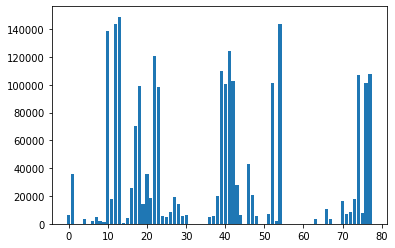

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

# define feature selection
fs = SelectKBest(score_func=f_classif, k=30)
# apply feature selection
fs.fit(X,Y)
X_train_fs=fs.transform(X)

for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
features = data.columns

In [ ]:
top_features = []
for i in range(len(fs.scores_)):
  if fs.scores_[i] > 10000 :
    top_features.append(i)

In [ ]:
print(len(top_features))

31


In [ ]:
imp_features=[]
for i in top_features:
    imp_features.append(features[i])
imp_features

['Flow Duration',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'Average Packet Size',
 'Avg Bwd Segment Size',
 'Init_Win_bytes_forward',
 'Active Mean',
 'Active Min',
 'Idle Mean',
 'Idle Max',
 'Idle Min']

In [ ]:
# taking only the top features
X_new=X.iloc[:,top_features]

In [ ]:
X_new.shape

(2298395, 31)

In [ ]:
X=X_new

In [ ]:
import os
from os.path import join
import pandas as pd
import numpy as np
from tensorflow.keras.utils import plot_model
import tensorflow
import keras
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Input, Reshape
from keras.layers import Activation, Dropout, Flatten, Dense
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [ ]:
inputs= Input(shape=(6,6,1))

#defining the model
x=Conv2D(100, 2, activation = 'relu', padding='same')(inputs)
x=MaxPooling2D((2,2),(2,2))(x)
x=Conv2D(50, 2, activation = 'relu', padding='same')(x)
x=MaxPooling2D()(x)
x=Flatten()(x)
x=Dense(10, activation='relu' )(x)
predictions = Dense(15, activation='softmax')(x)
model = Model(inputs=inputs, outputs=predictions)


kf=KFold(n_splits=3, random_state=1, shuffle=True)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6, 6, 1)]         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 6, 6, 100)         500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 100)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 50)          20050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510   

In [ ]:
# to resize the inputs
result = np.zeros((X_new.shape[0], 36))
result[:, :-5] = X_new

# reshaping dataset
result = np.reshape(result, (result.shape[0], 6, 6))
result = result[..., tensorflow.newaxis]

In [ ]:
result.shape

(2298395, 6, 6, 1)

In [ ]:
from keras.utils.np_utils import to_categorical 
# labels are created using values of Y
label = []
for i in Y:
  if i == "BENIGN":
    label.append("0")
  if i == "DoS Hulk":
    label.append("1")
  if i == "PortScan":
    label.append("2")
  if i == "DDoS":
    label.append("3")
  if i == "DoS GoldenEye":
    label.append("4")
  if i == "FTP-Patator":
    label.append("5")
  if i == "SSH-Patator":
    label.append("6")
  if i == "DoS slowloris":
    label.append("7")
  if i == "DoS Slowhttptest":
    label.append("8")
  if i == "Bot":
    label.append("9")
  if i == "Web Attack-Brute Force":
    label.append("10")
  if i == "Web Attack-XSS":
    label.append("11")
  if i == "Infiltration":
    label.append("12")
  if i == "Web Attack-Sql Injection":
    label.append("13")
  if i == "Heartbleed":
    label.append("14")

label=np.asarray(label)
label=to_categorical(label)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( result, label, test_size=0.2, random_state=42)

In [ ]:
# training the CNN
from keras.callbacks import ModelCheckpoint
for train_index, test_index in kf.split(X_train):
  training_X,testing_X=X_train[train_index], X_train[test_index]
  training_Y, testing_Y=y_train[train_index], y_train[test_index]
  filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
  callbacks_list = [checkpoint]
  history=model.fit (X_train,y_train, epochs=5, batch_size=2000, verbose=1, validation_data=(testing_X, testing_Y), callbacks=callbacks_list)

model.save('ids-cnn1.h5')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylim(0.6, 1.0)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('drive/MyDrive/ids-cnn1.h5')
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {score[1]}')